In [1]:
import cv2  
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import csv

#Importing PIL library for working with Images
from PIL import Image 

#Collab not support cv2.imshow method thus, importing cv2.imshow method for better Image visualization 
from google.colab.patches import cv2_imshow

#Importing asarray method from numpy for dealing with pixels of Images
from numpy import asarray 

import matplotlib.image as mpimg

#Importing ndimage from scipy as this package contains various functions for multidimensional image processing.
from scipy import ndimage

#Importing filters, features, measures and color from skimage
from skimage import filters, feature, measure, color

#Importing Watershed for touching Grains sepration
from skimage.segmentation import watershed

In [2]:
#Defining show function for displaying  image with custom X and Y cordinates

def show(image,x=30,y=7):
  img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(x,y))
  plt.imshow(img)

In [7]:
img1 = cv2.imread("image_1.jpg")
img2 = cv2.imread("image_2.jpg")
img3 = cv2.imread("image_3.jpg")
img4 = cv2.imread("image_4.jpg")
img5 = cv2.imread("image_5.jpg")

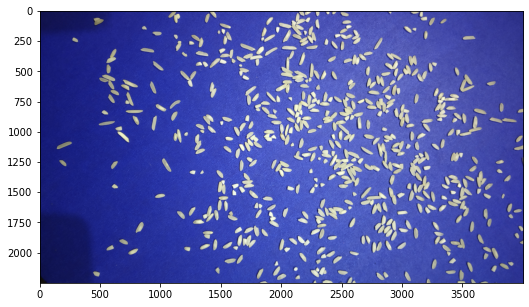

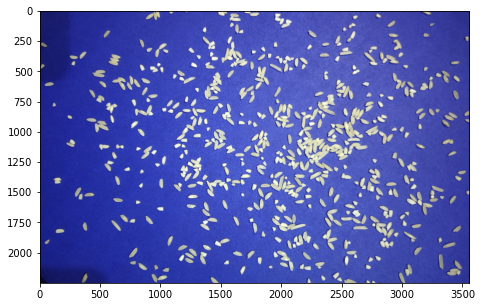

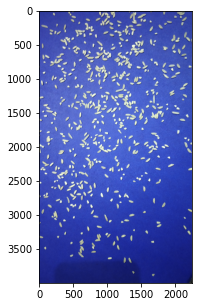

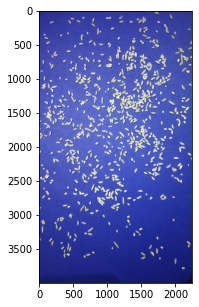

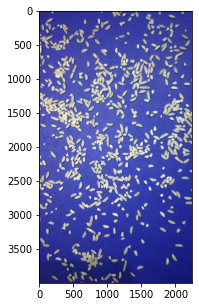

In [8]:
show(img1,25,5)
show(img2,25,5)
show(img3,25,5)
show(img4,25,5)
show(img5,25,5)

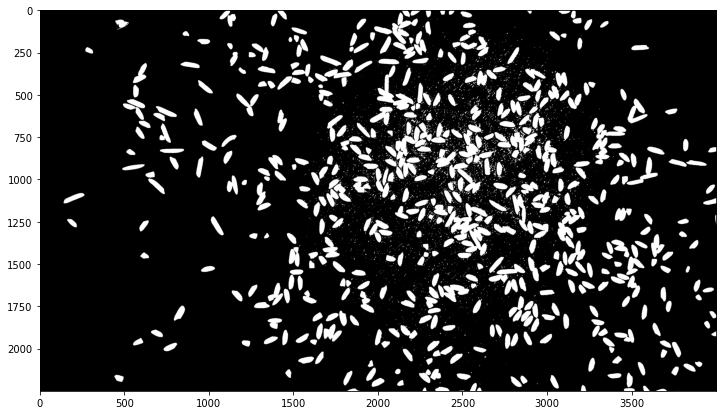

In [9]:
#Converting BGR Image to Gray for Image thresholding and further Image-Preprocessing application
grayscale_Image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret1, thresh_img1 = cv2.threshold(grayscale_Image1, 120, 255, cv2.THRESH_BINARY) #120, 255 mentions the grayscale scale values

grayscale_Image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ret2, thresh_img2 = cv2.threshold(grayscale_Image2, 120, 255, cv2.THRESH_BINARY)

grayscale_Image3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
ret3, thresh_img3 = cv2.threshold(grayscale_Image3, 120, 255, cv2.THRESH_BINARY)

grayscale_Image4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
ret4, thresh_img4 = cv2.threshold(grayscale_Image4, 120, 255, cv2.THRESH_BINARY)

grayscale_Image4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
ret4, thresh_img4 = cv2.threshold(grayscale_Image4, 120, 255, cv2.THRESH_BINARY)

grayscale_Image5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
ret5, thresh_img5 = cv2.threshold(grayscale_Image5, 120, 255, cv2.THRESH_BINARY)

#Using show function earlier defined
show(thresh_img1)

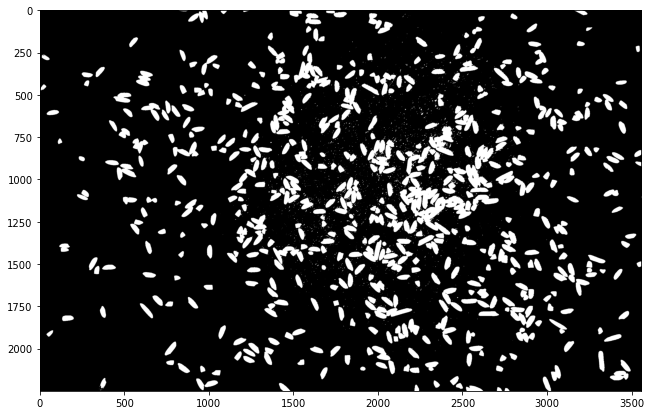

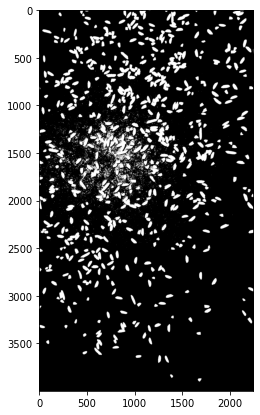

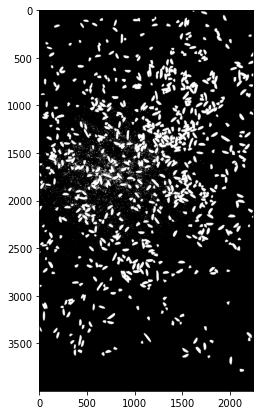

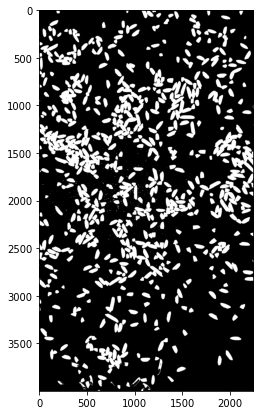

In [10]:
show(thresh_img2)
show(thresh_img3)
show(thresh_img4)
show(thresh_img5)

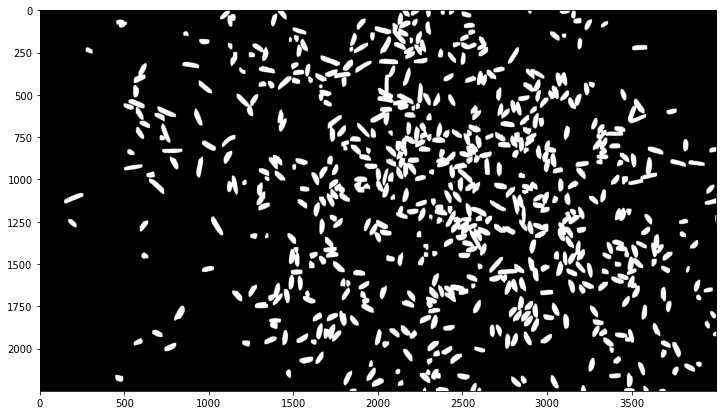

In [11]:
# Noise removal
kernel = np.ones((3),np.uint8)
clear_image1 = cv2.morphologyEx(thresh_img1,cv2.MORPH_OPEN, kernel, iterations=8)

kernel = np.ones((3),np.uint8)
clear_image2 = cv2.morphologyEx(thresh_img2,cv2.MORPH_OPEN, kernel, iterations=8)

clear_image3 = cv2.morphologyEx(thresh_img3,cv2.MORPH_OPEN, kernel, iterations=8)

clear_image4 = cv2.morphologyEx(thresh_img4,cv2.MORPH_OPEN, kernel, iterations=8)

clear_image5 = cv2.morphologyEx(thresh_img5,cv2.MORPH_OPEN, kernel, iterations=8)

#Using show function earlier defined
show(clear_image1)

In [12]:
#Copying the preprocessed image as label_image
label_image1 = clear_image1.copy()

#Creating a label_count variable to the count the number of grains in the image
label_count1 = 0

#Shape function for getting height and width
rows, cols = label_image1.shape

#Looping through the pixel of image using rows and column of image
for j in range(rows):
    for i in range(cols):
        pixel = label_image1[j, i]

        #Here there is single channel with 2 pixel intensities, Either 0 or 255. 0 represent black portion, where 255 represent grains (White).
        #Counting the total number of pixel with intensity 255
        if 255 == pixel:
            label_count1 += 1

            ##Applying floodFill method of opencv which will help in filling the backgroud that will ultimately helps in couting the contoured grain easily
            cv.floodFill(label_image1, None, (i, j), label_count1)

# show(label_image1)

In [13]:
label_image2 = clear_image2.copy()

label_count2 = 0

rows, cols = label_image2.shape

for j in range(rows):
    for i in range(cols):
      pixel = label_image2[j, i]

      if 255 == pixel:
        label_count2 += 1

        cv.floodFill(label_image2, None, (i, j), label_count2)

# show(label_image2)

In [14]:
label_image3 = clear_image3.copy()

label_count3 = 0

rows, cols = label_image3.shape

for j in range(rows):
    for i in range(cols):
      pixel = label_image3[j, i]

      if 255 == pixel:
        label_count3 += 1

        cv.floodFill(label_image3, None, (i, j), label_count3)

# show(label_image3

In [15]:
label_image4 = clear_image4.copy()

label_count4 = 0

rows, cols = label_image4.shape

for j in range(rows):
    for i in range(cols):
      pixel = label_image4[j, i]

      if 255 == pixel:
        label_count4 += 1

        cv.floodFill(label_image4, None, (i, j), label_count4)

# show(label_image4)

In [16]:
label_image5 = clear_image5.copy()

label_count5 = 0

rows, cols = label_image5.shape

for j in range(rows):
    for i in range(cols):
      pixel = label_image5[j, i]

      if 255 == pixel:
        label_count5 += 1

        cv.floodFill(label_image5, None, (i, j), label_count5)

# show(label_image5)

In [17]:
print("Number of foreground objects in Image: 1 ", label_count1)
print("Number of foreground objects in Image: 2 ", label_count2)
print("Number of foreground objects in Image: 3 ", label_count3)
print("Number of foreground objects in Image: 4 ", label_count4)
print("Number of foreground objects in Image: 5 ", label_count5)

Number of foreground objects in Image: 1  516472
Number of foreground objects in Image: 2  406078
Number of foreground objects in Image: 3  468236
Number of foreground objects in Image: 4  472099
Number of foreground objects in Image: 5  639467


In [18]:
#Applying Countours method to get the count of rice grains
#image 1
contours1, hierarchy1 = cv.findContours(clear_image1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour1 = cv.cvtColor(clear_image1, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour1, contours1, -1, (0, 0, 255), 2)

#image 2
contours2, hierarchy2 = cv.findContours(clear_image2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour2 = cv.cvtColor(clear_image2, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour2, contours2, -1, (0, 0, 255), 2)

#image 3
contours3, hierarchy3 = cv.findContours(clear_image3, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour3 = cv.cvtColor(clear_image3, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour3, contours3, -1, (0, 0, 255), 2)

#image 4
contours4, hierarchy4 = cv.findContours(clear_image4, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour4 = cv.cvtColor(clear_image4, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour4, contours4, -1, (0, 0, 255), 2)

#image 5
contours5, hierarchy5 = cv.findContours(clear_image5, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output_contour5 = cv.cvtColor(clear_image5, cv.COLOR_GRAY2BGR)
cv.drawContours(output_contour5, contours5, -1, (0, 0, 255), 2)


print("Number of detected Grains in Image: 1", len(contours1))
print("Number of detected Grains in Image: 2", len(contours2))
print("Number of detected Grains in Image: 3", len(contours3))
print("Number of detected Grains in Image: 4", len(contours4))
print("Number of detected Grains in Image: 5", len(contours5))

Number of detected Grains in Image: 1 513
Number of detected Grains in Image: 2 517
Number of detected Grains in Image: 3 661
Number of detected Grains in Image: 4 629
Number of detected Grains in Image: 5 504


 
 Image: 1


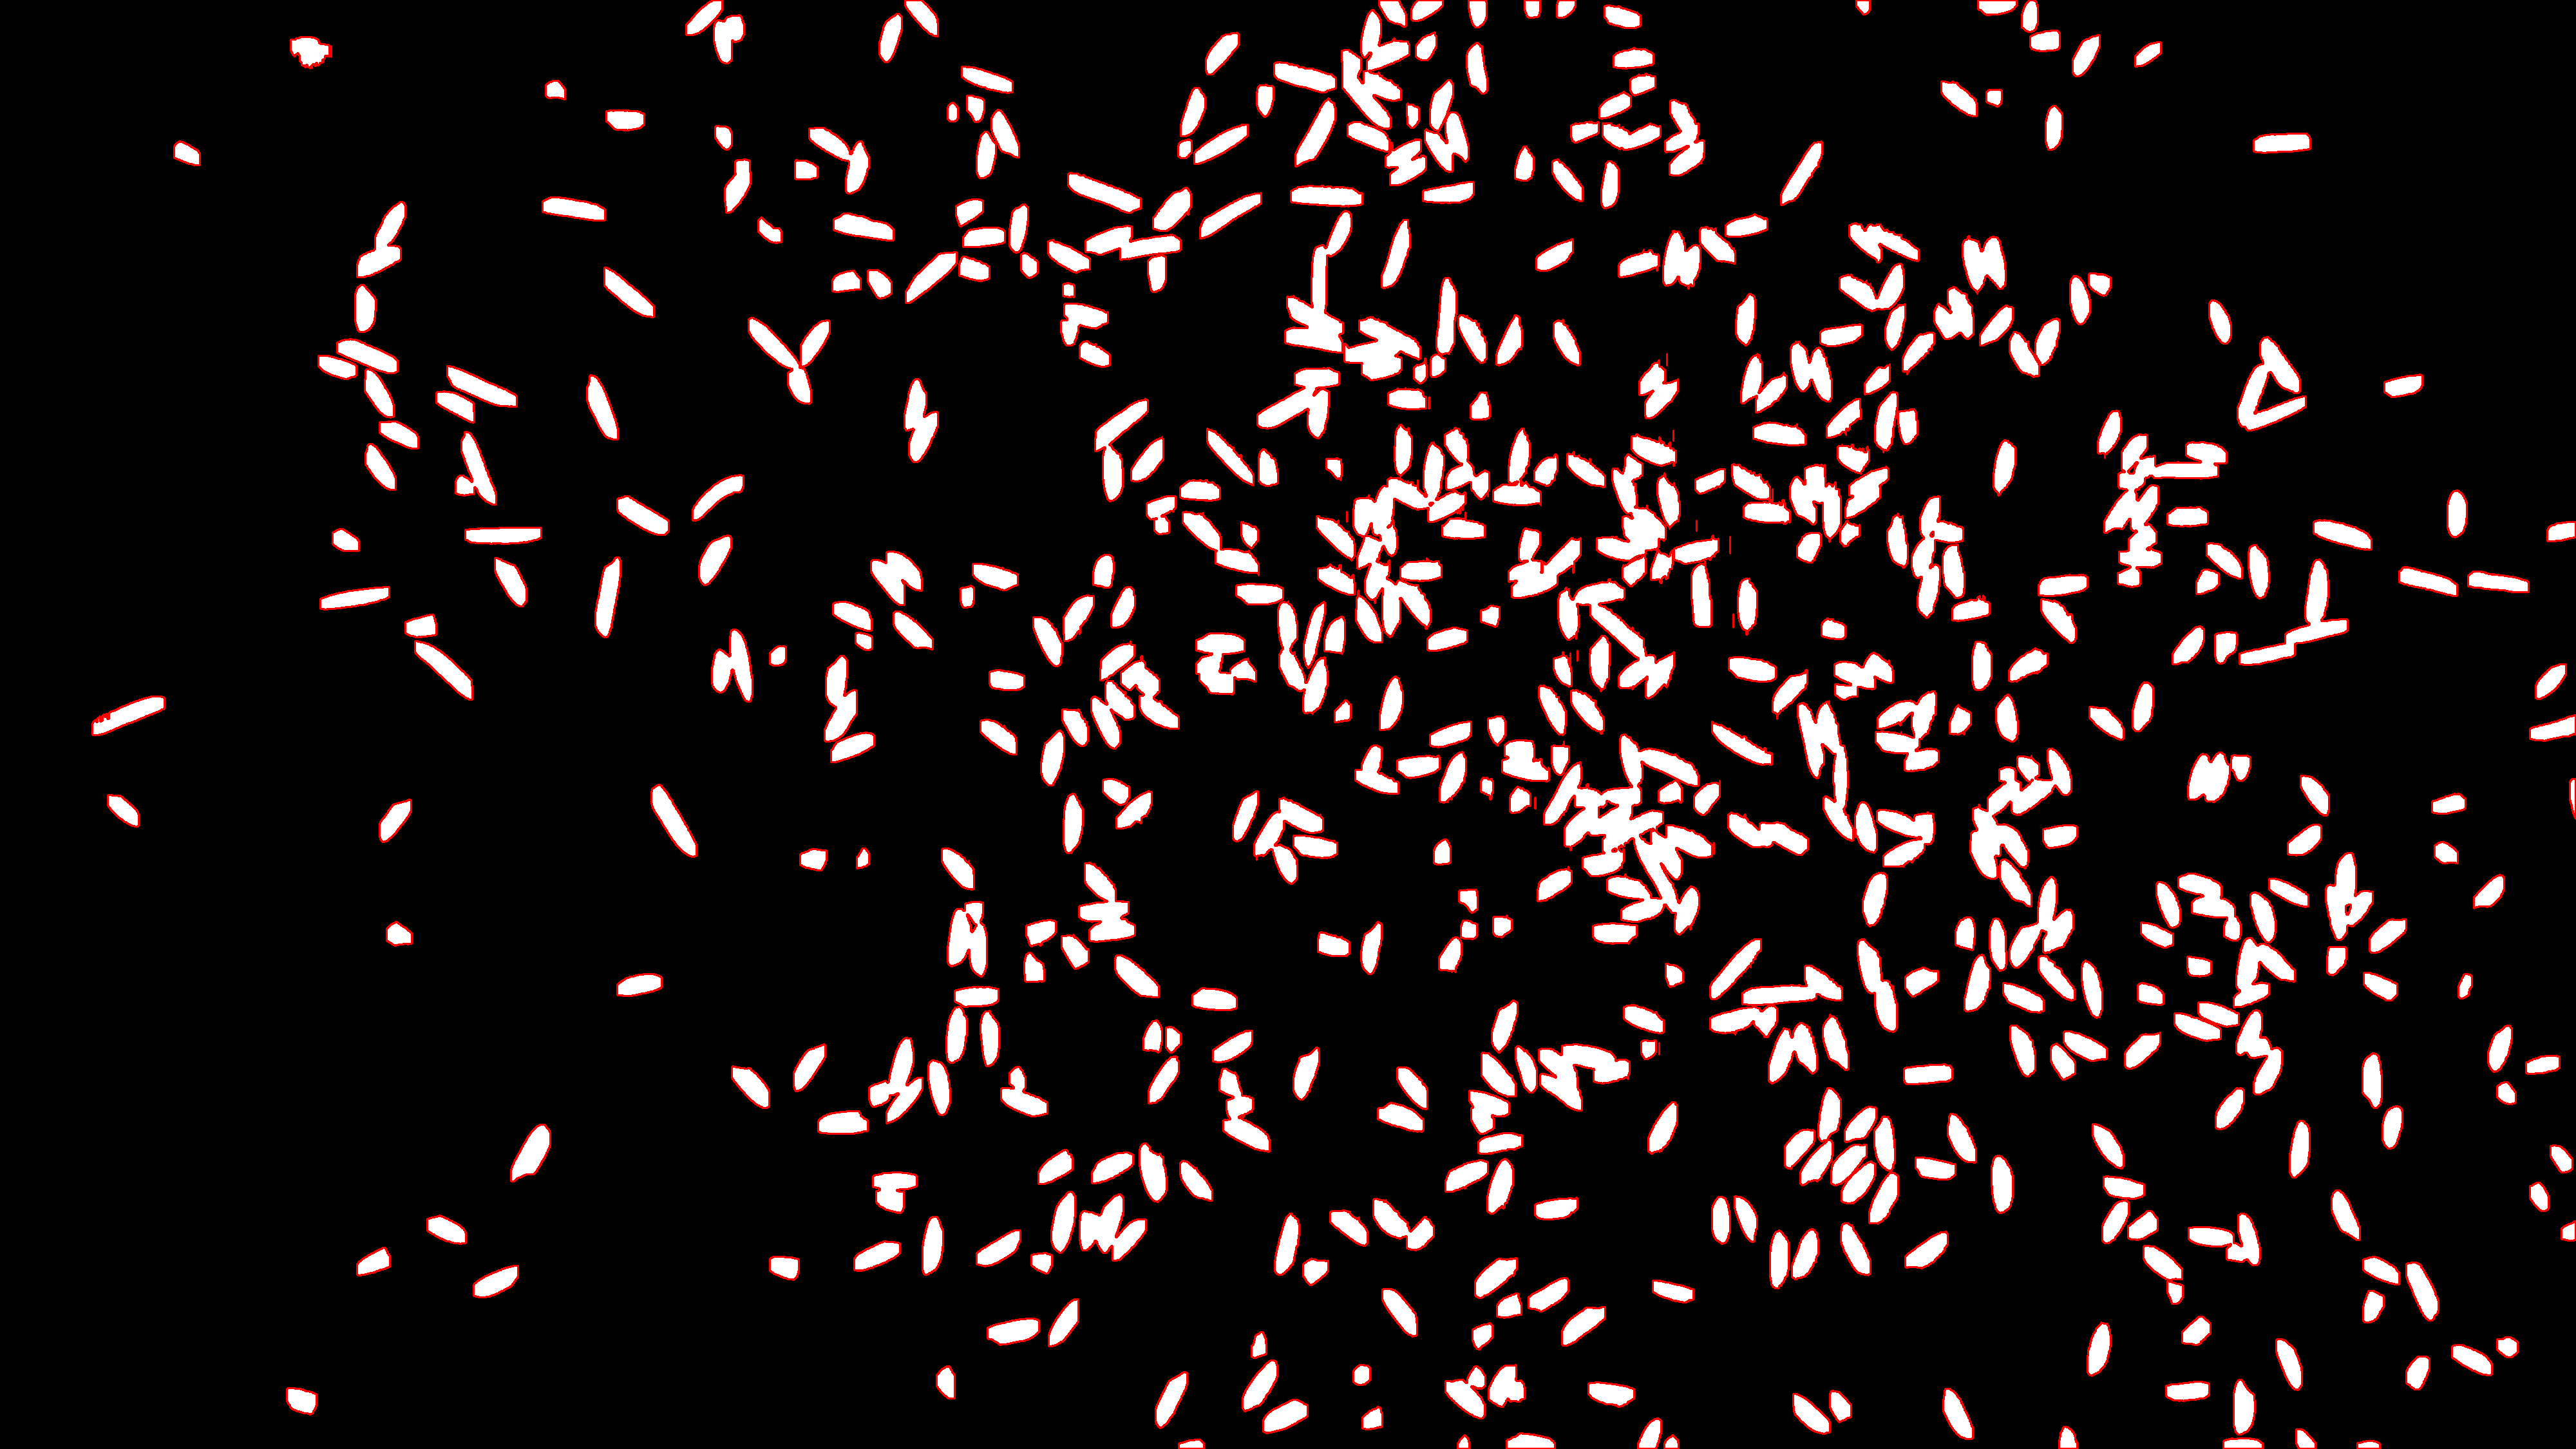

In [19]:
print(" \n Image: 1")
cv2_imshow(output_contour1)

 
 Image: 2


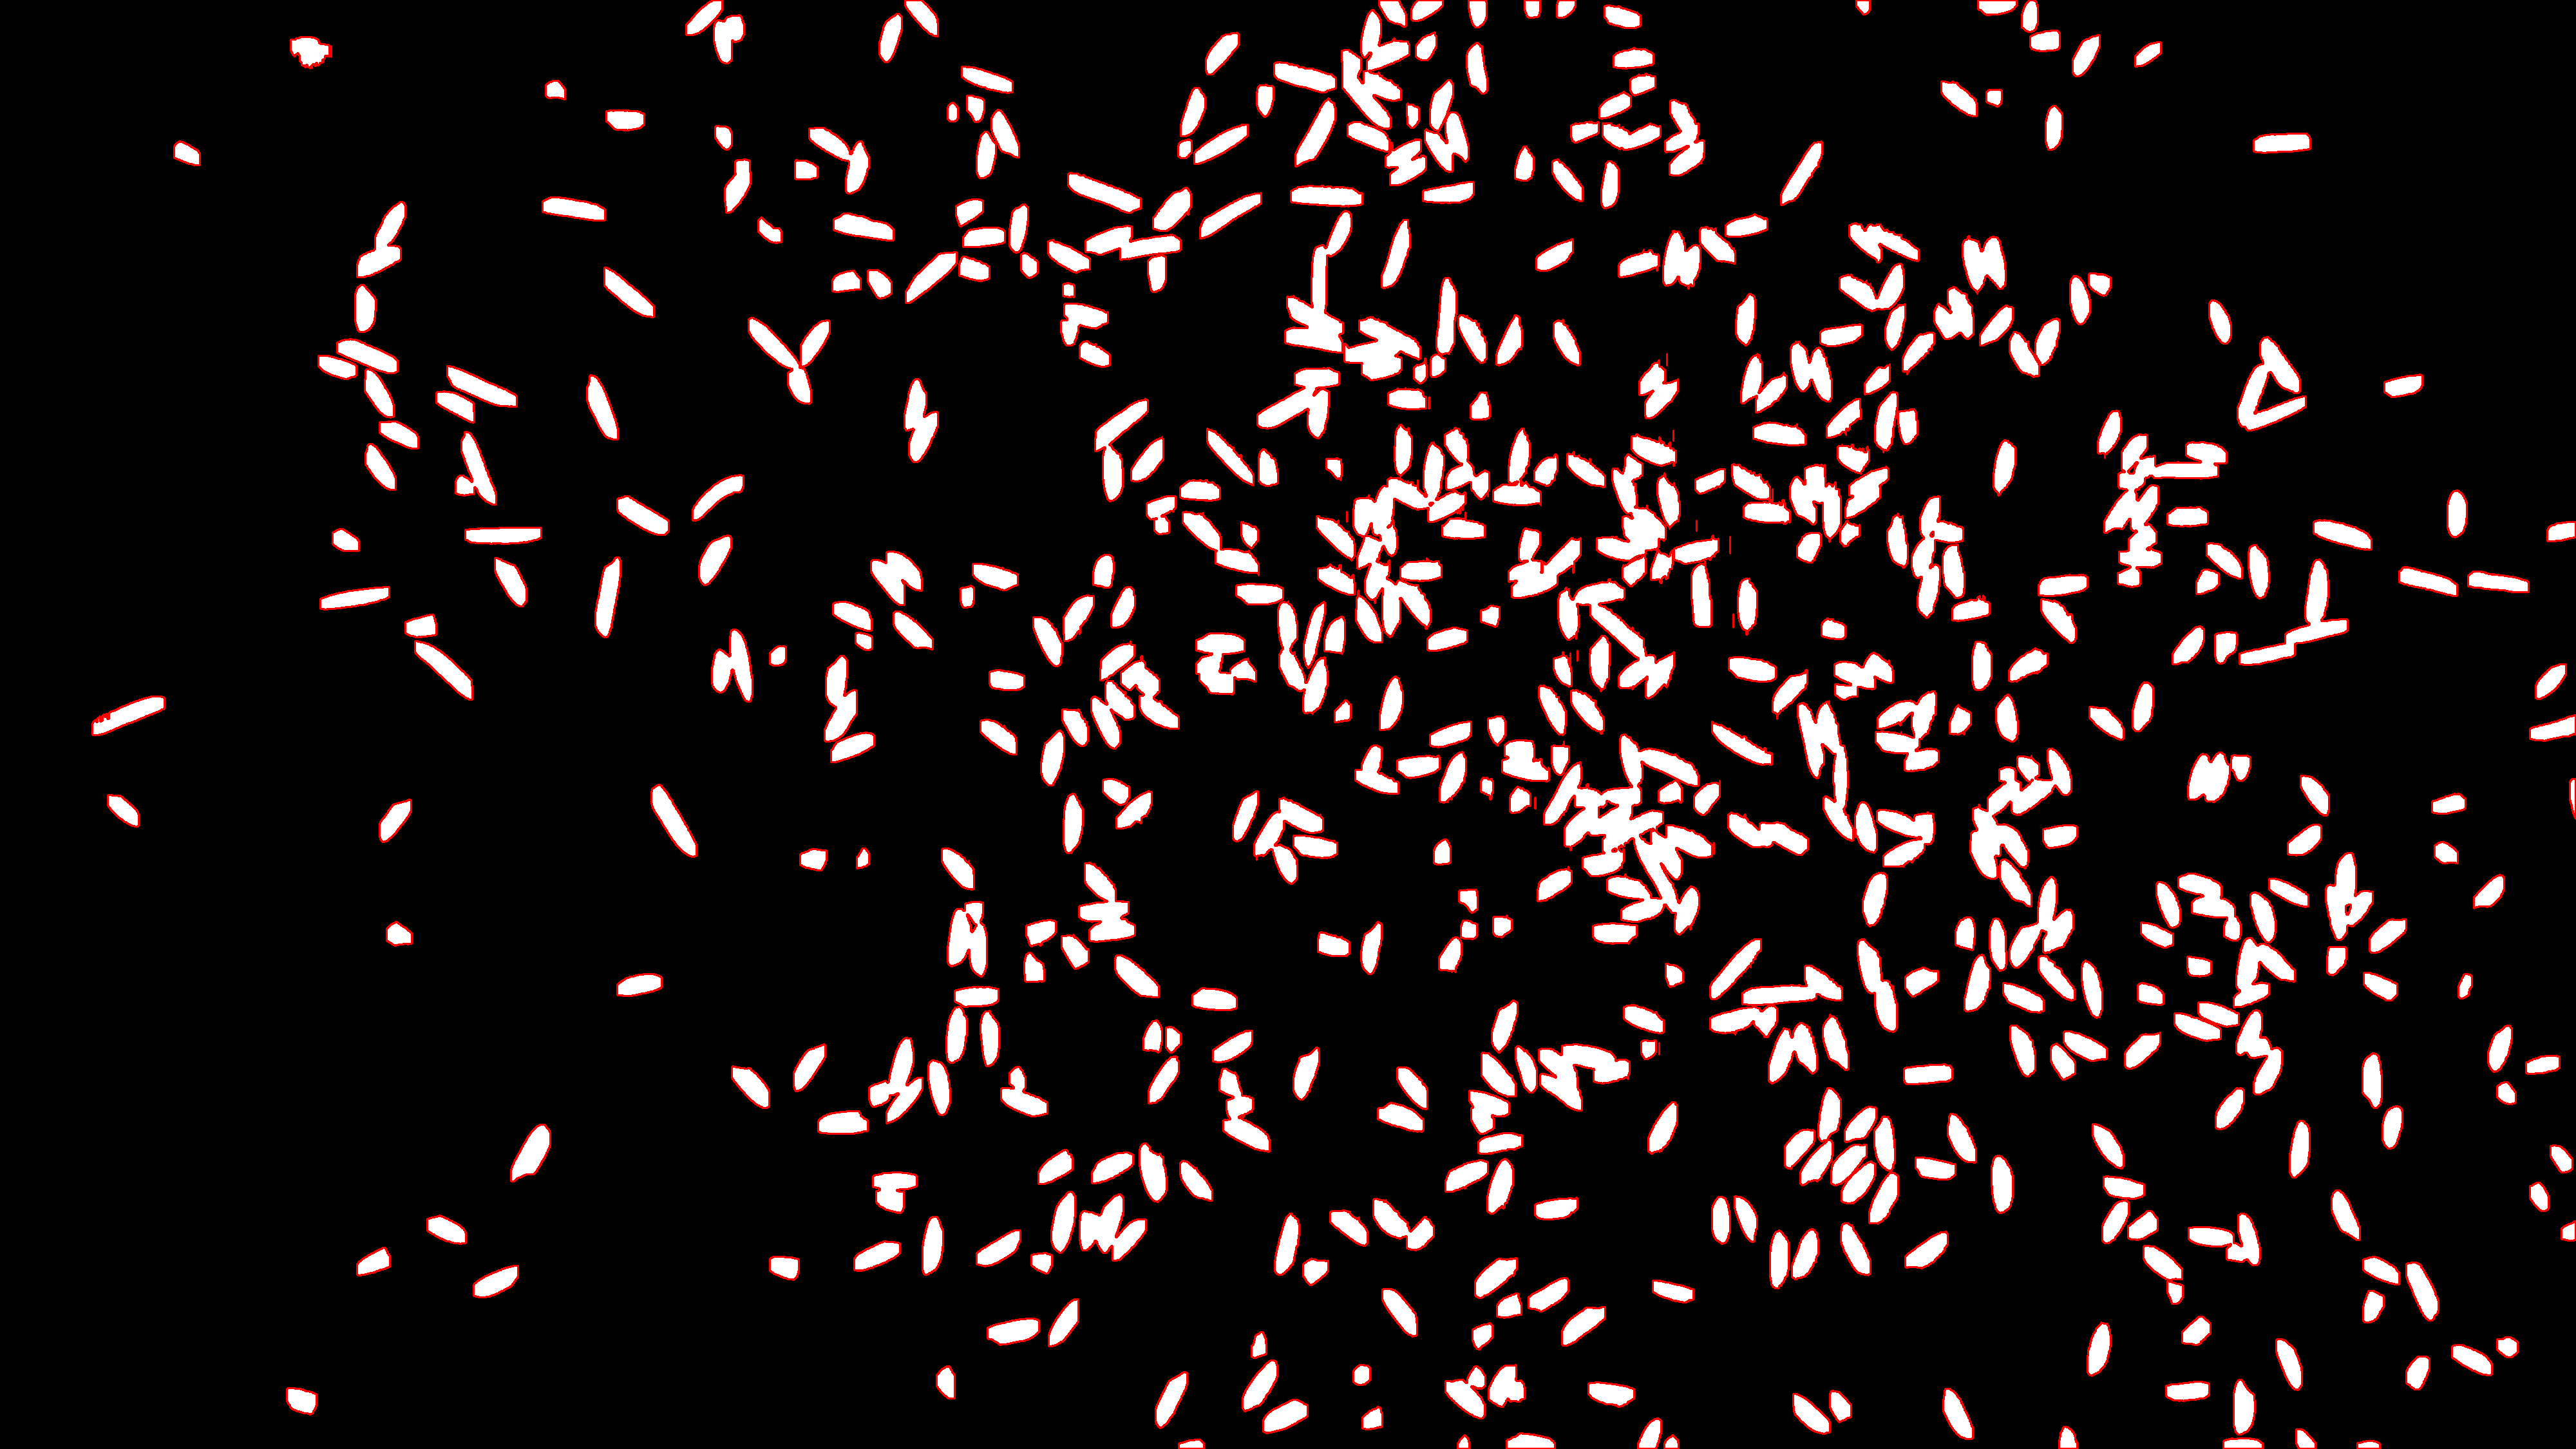

In [20]:
print(" \n Image: 2")
cv2_imshow(output_contour1)

 
 Image: 3


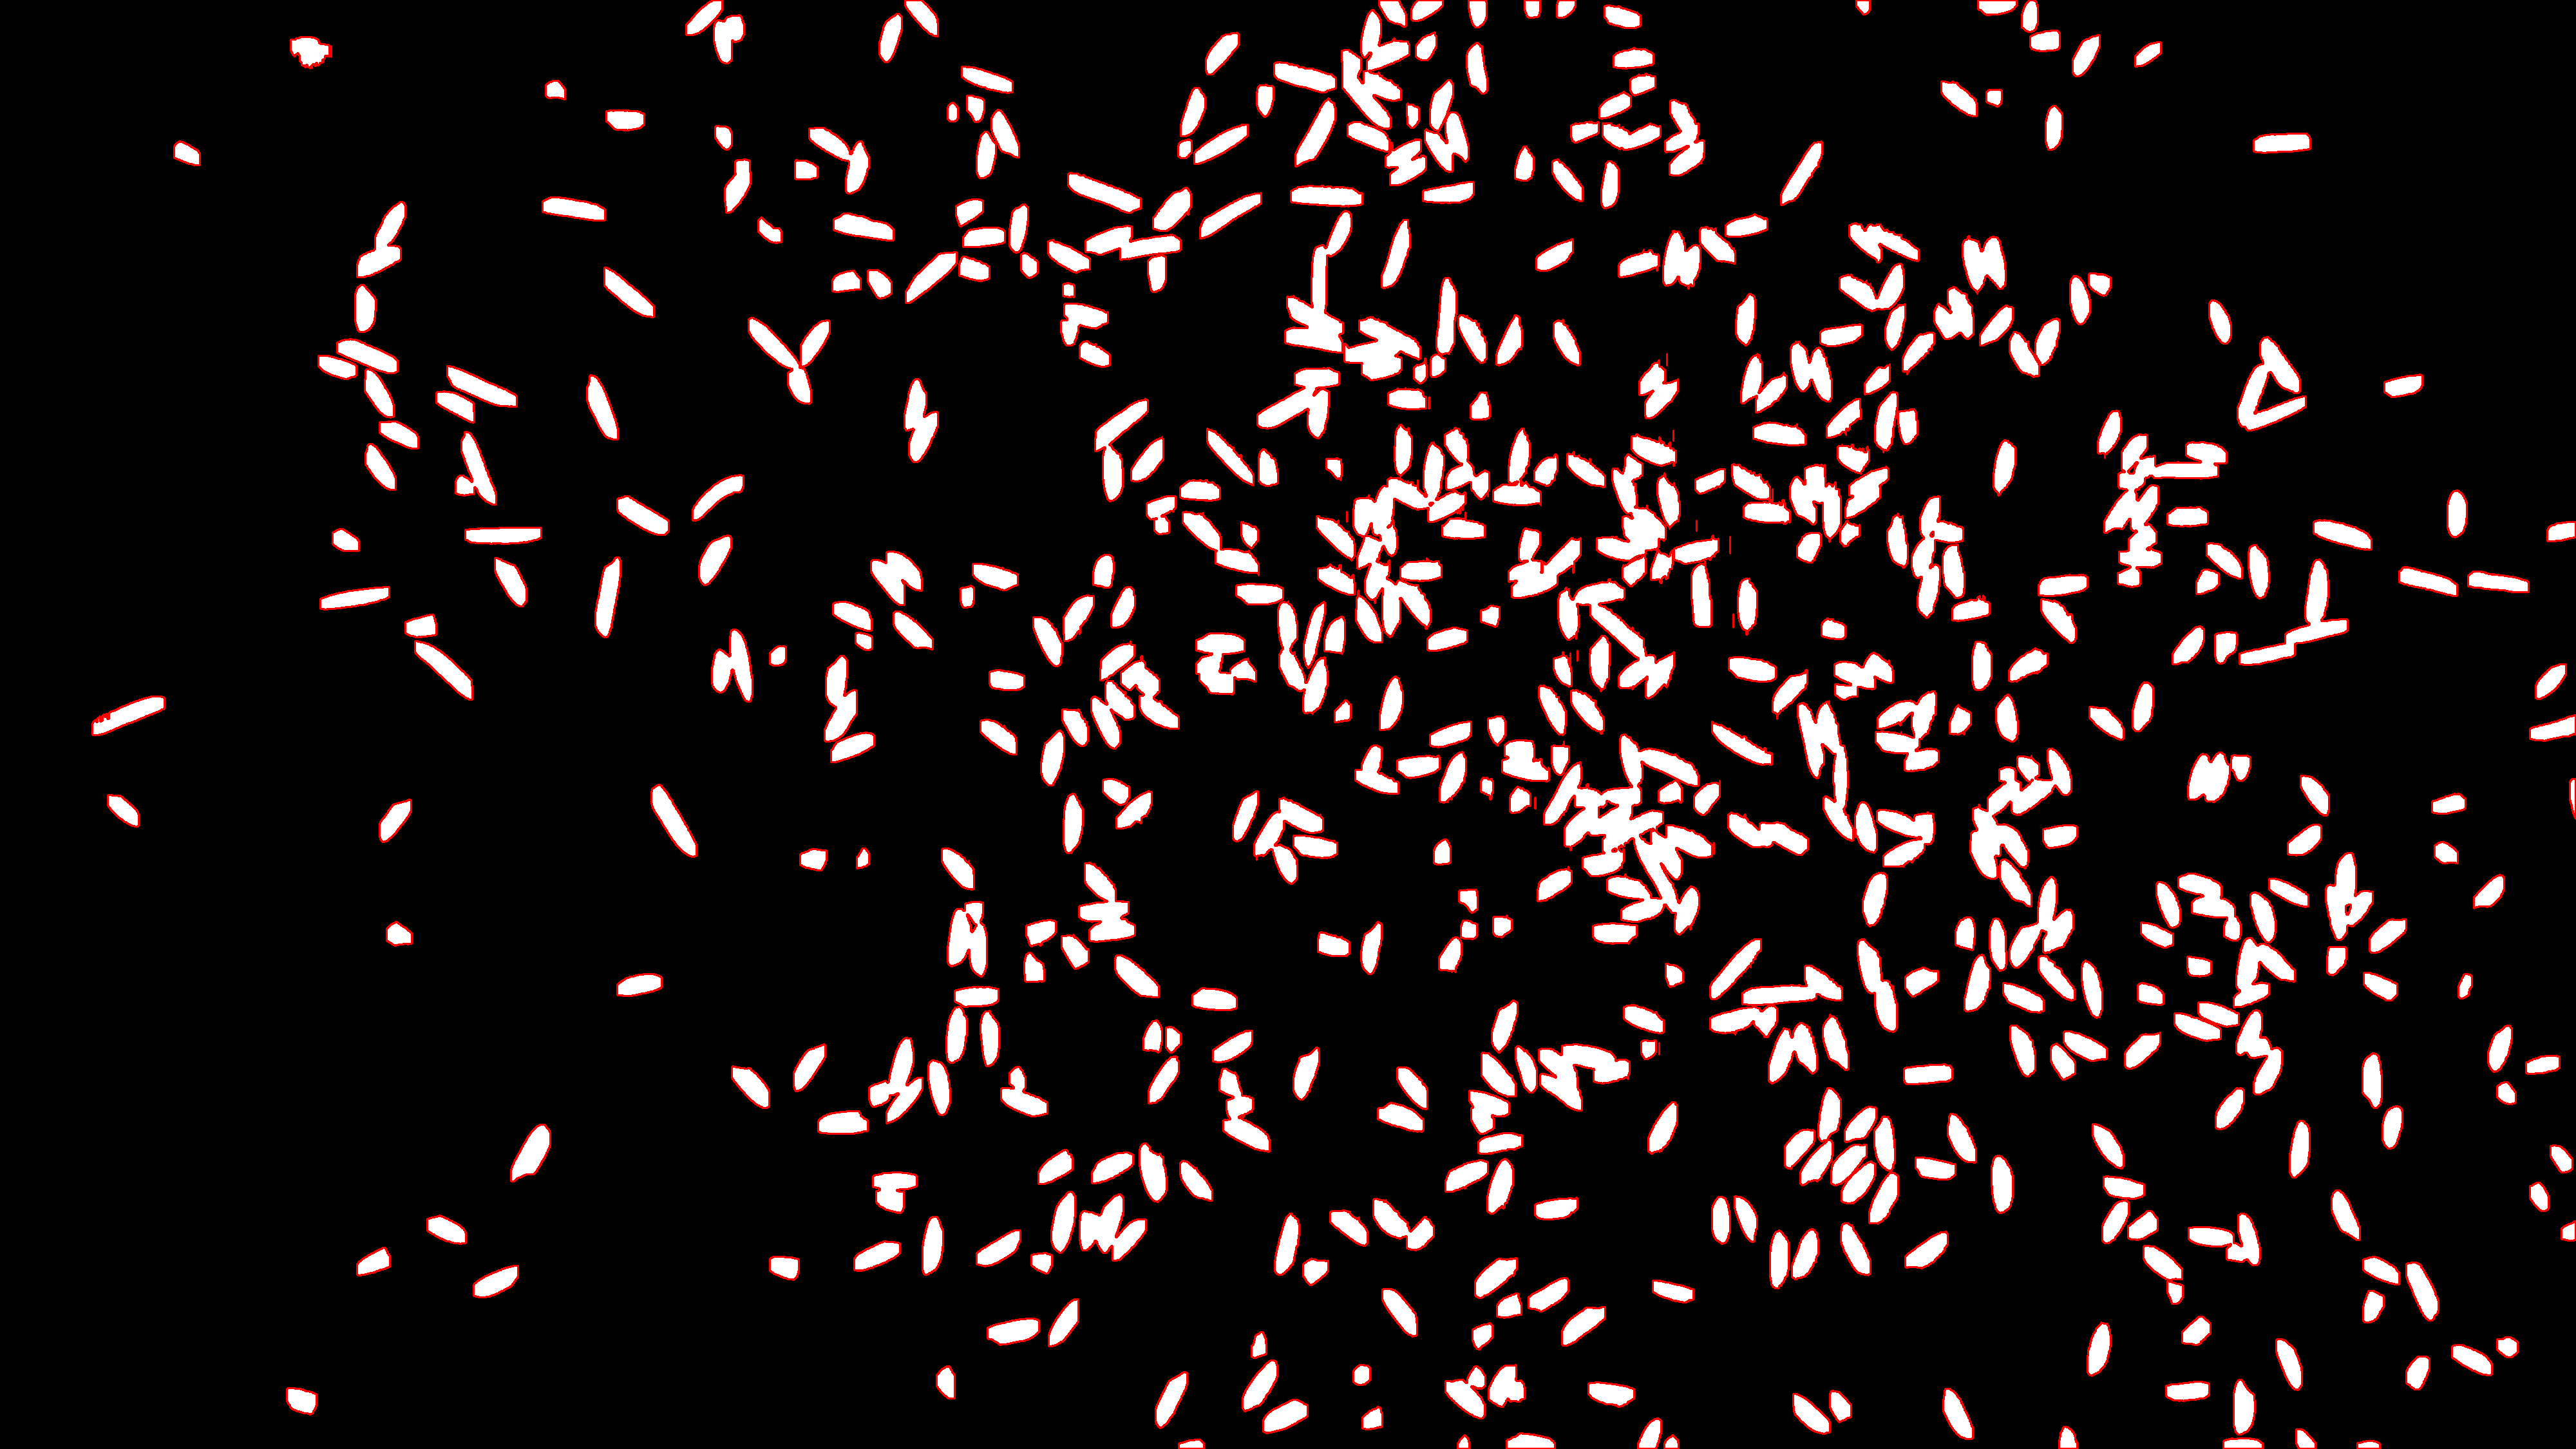

In [21]:
print(" \n Image: 3")
cv2_imshow(output_contour1)

 
 Image: 4


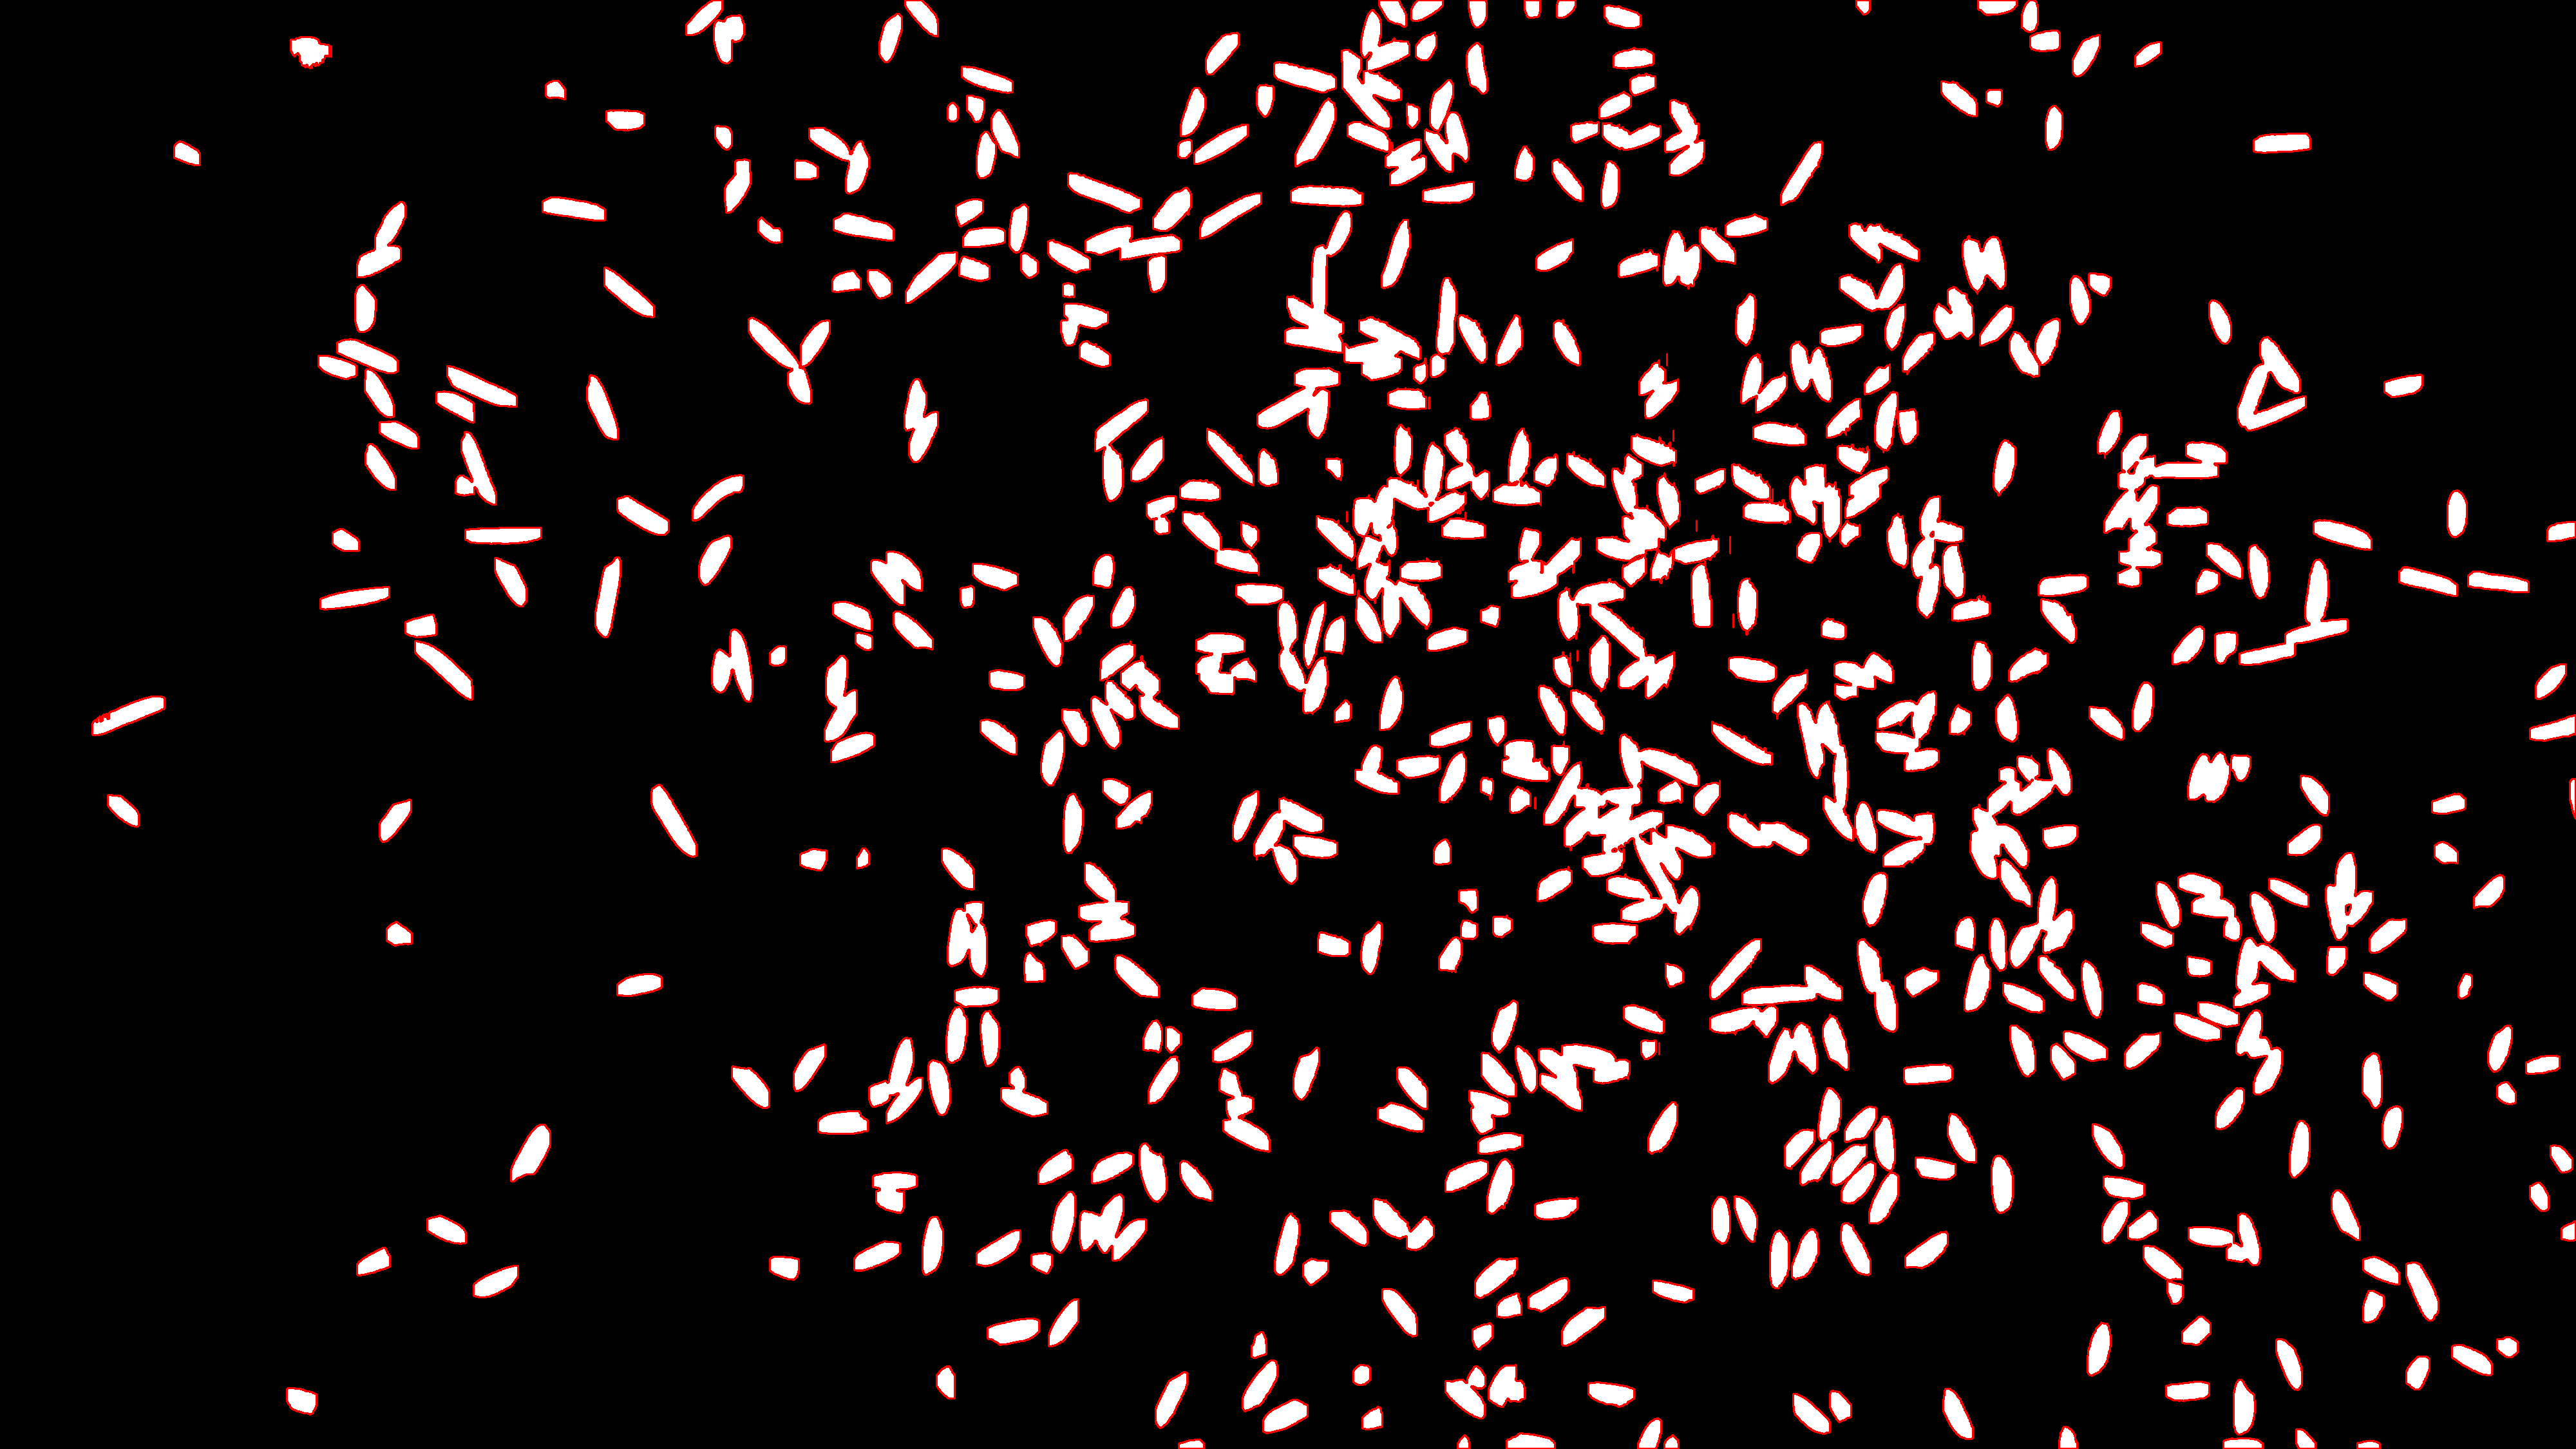

In [22]:
print(" \n Image: 4")
cv2_imshow(output_contour1)

 
 Image: 5


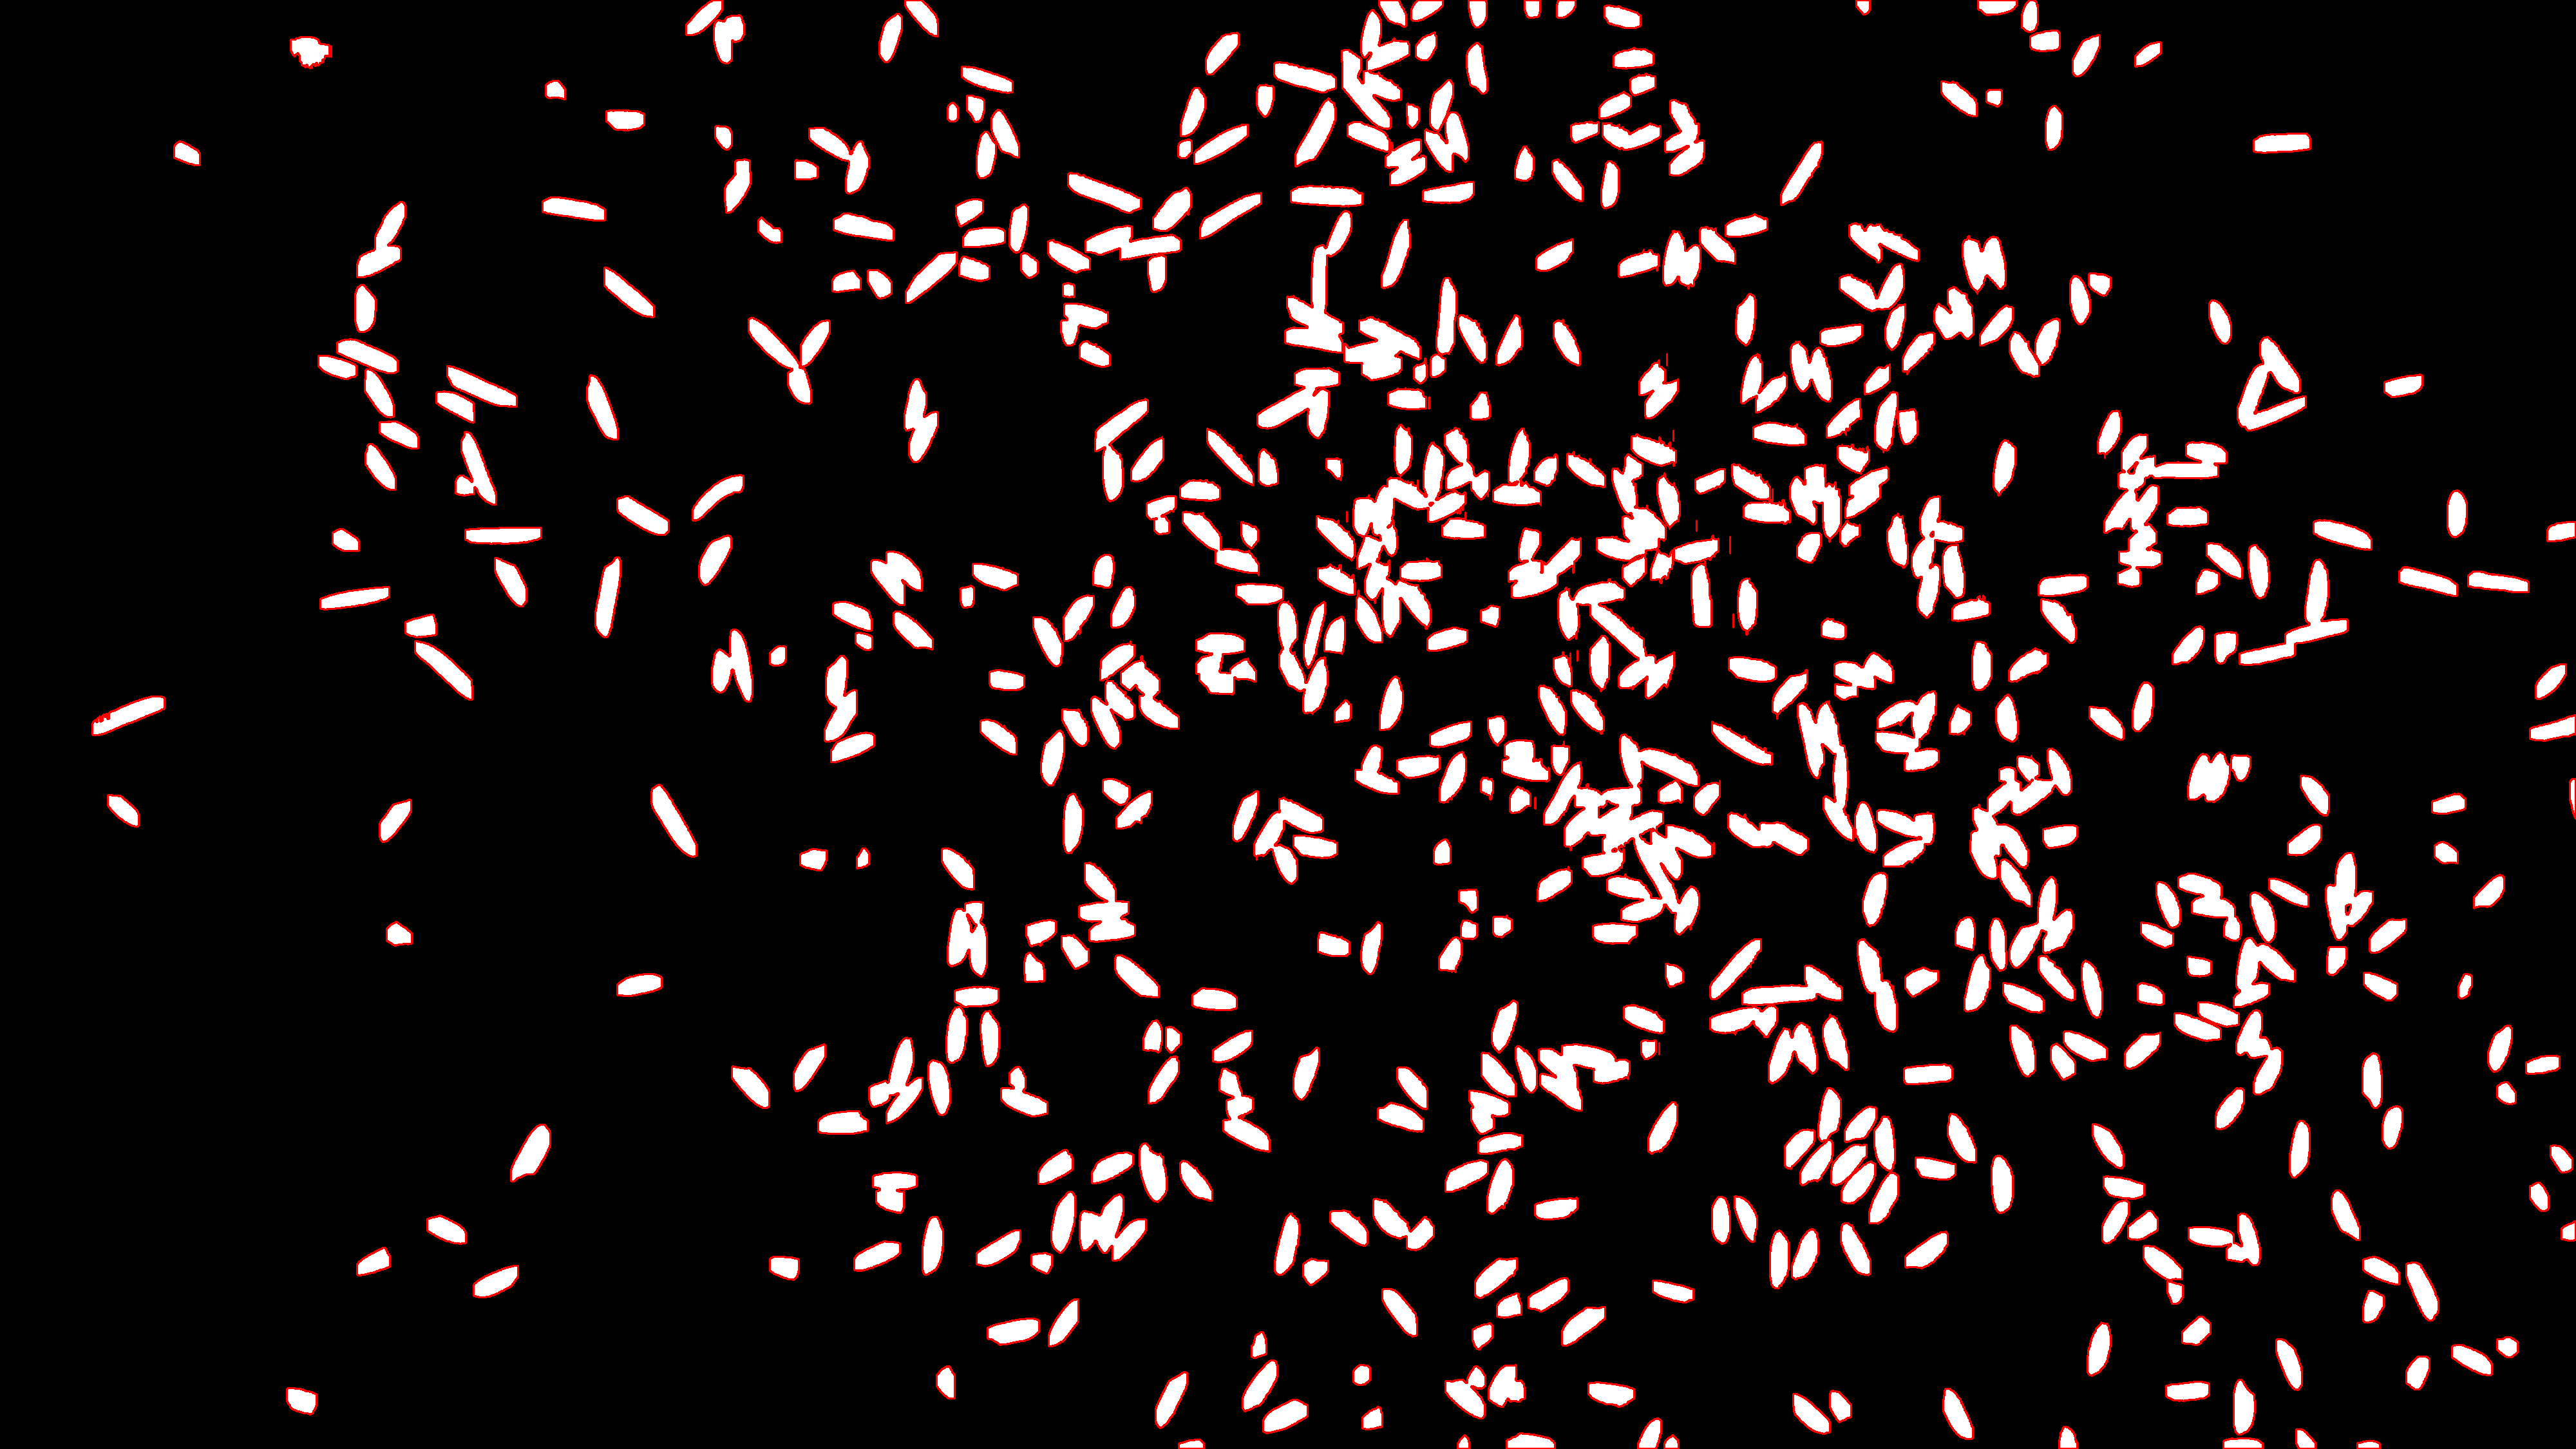

In [23]:
print(" \n Image: 5")
cv2_imshow(output_contour1)

In [24]:
# Image 1

#Applying  distance_transform_edt to computes the distance from non-zero (i.e. non-background) points to the nearest zero (i.e. background) point.
dist_trans1 = ndimage.distance_transform_edt(clear_image1)

#Applying peak_local_max function for getting coordinates of local peaks (maxima) in an image.
local_max1 = feature.peak_local_max(dist_trans1, min_distance=23)

local_max_mask = np.zeros(dist_trans1.shape, dtype=bool)
local_max_mask[tuple(local_max1.T)] = True

#Aplying Watershed algorithm
labels1 = watershed(-dist_trans1, measure.label(local_max_mask), mask=clear_image1) # separate merged corns

In [25]:
# Image 2

dist_trans2 = ndimage.distance_transform_edt(clear_image2)

local_max2 = feature.peak_local_max(dist_trans2, min_distance=23)

local_max_mask = np.zeros(dist_trans2.shape, dtype=bool)
local_max_mask[tuple(local_max2.T)] = True

labels2 = watershed(-dist_trans2, measure.label(local_max_mask), mask=clear_image2)

In [26]:
# Image 3

dist_trans3 = ndimage.distance_transform_edt(clear_image3)


local_max3 = feature.peak_local_max(dist_trans3, min_distance=23)


local_max_mask = np.zeros(dist_trans3.shape, dtype=bool)
local_max_mask[tuple(local_max3.T)] = True


labels3 = watershed(-dist_trans3, measure.label(local_max_mask), mask=clear_image3)

In [27]:
# Image 4

dist_trans4 = ndimage.distance_transform_edt(clear_image4)


local_max4 = feature.peak_local_max(dist_trans4, min_distance=23)



local_max_mask = np.zeros(dist_trans4.shape, dtype=bool)
local_max_mask[tuple(local_max4.T)] = True



labels4 = watershed(-dist_trans4, measure.label(local_max_mask), mask=clear_image4)

In [28]:
# Image 5

dist_trans5 = ndimage.distance_transform_edt(clear_image5)

local_max5 = feature.peak_local_max(dist_trans5, min_distance=23)

local_max_mask = np.zeros(dist_trans5.shape, dtype=bool)
local_max_mask[tuple(local_max5.T)] = True

labels5 = watershed(-dist_trans5, measure.label(local_max_mask), mask=clear_image5)

Number of Rice grains are : 586


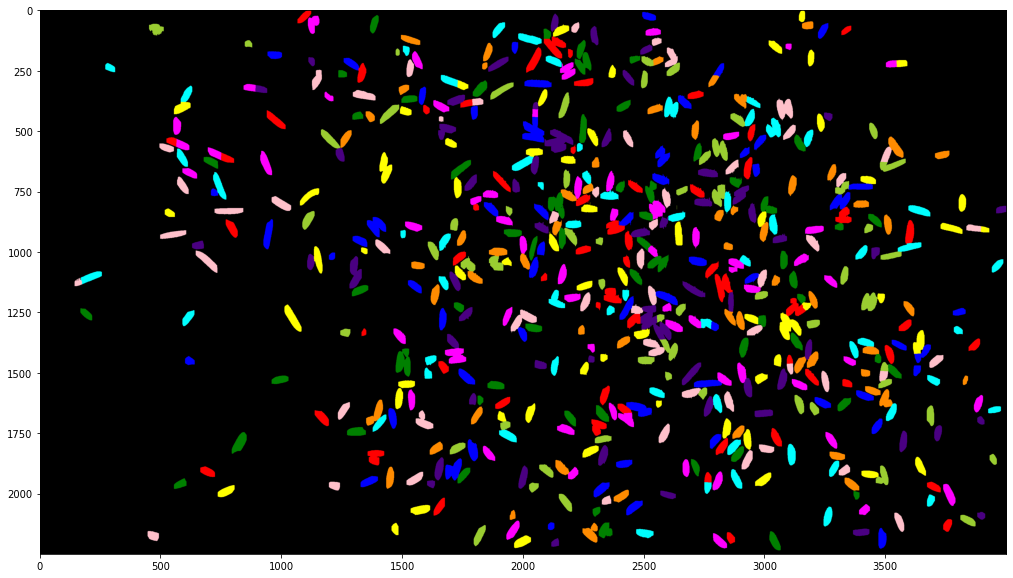

In [29]:
#label2rgb function, specifying the background label with argument bg_label=0.
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels1, bg_label=0))
print("Number of Rice grains are : %d" % labels1.max())

Number of Rice grains are : 602


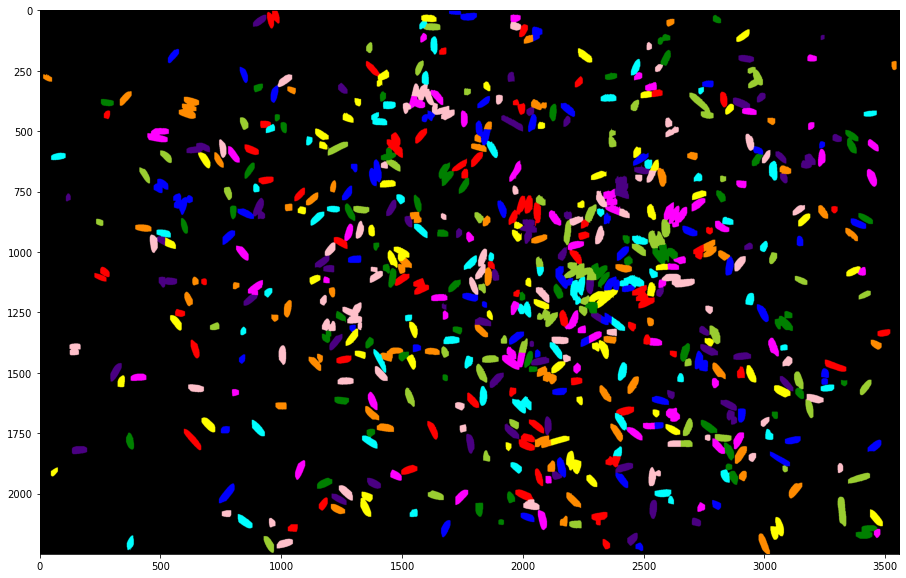

In [30]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels2, bg_label=0))
print("Number of Rice grains are : %d" % labels2.max())

Number of Rice grains are : 618


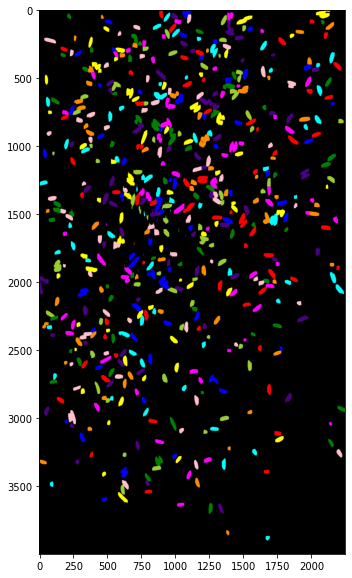

In [31]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels3, bg_label=0))
print("Number of Rice grains are : %d" % labels3.max())

Number of Rice grains are : 695


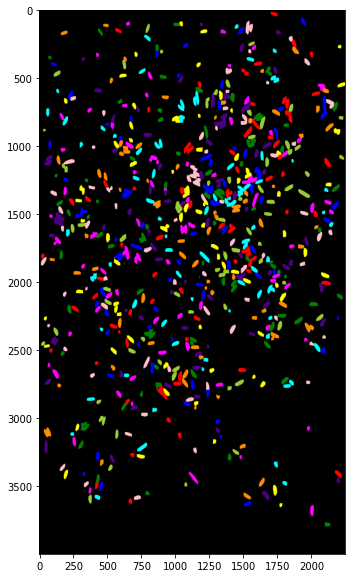

In [32]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels4, bg_label=0))
print("Number of Rice grains are : %d" % labels4.max())

Number of Rice grains are : 704


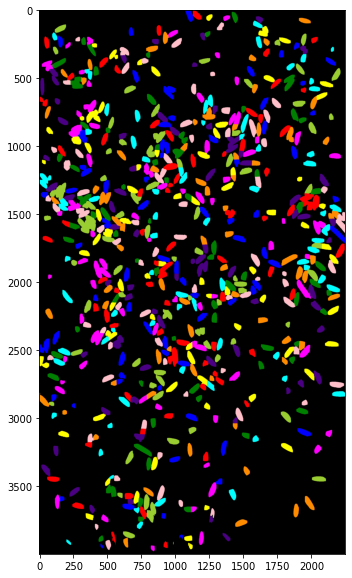

In [33]:
plt.figure(figsize=(30,10))
plt.imshow(color.label2rgb(labels5, bg_label=0))
print("Number of Rice grains are : %d" % labels5.max())

In [34]:
#Image 1

#Creating A list name count for counting the total Broken rice grains
count1 = []


#Iterating through contour and filtering out the rice grains with area less than 800 and then appending to the count variable.
for x in contours1:

  #Using contourArea method to get the area of rice (Contour)
  area = cv.contourArea(x)
  if area < 800 :
    count1.append(x)

print("Total number of broken rice present in the Image 1 is: ",len(count1))

Total number of broken rice present in the Image 1 is:  87


In [35]:
#Image 2

count2 = []

for x in contours2:
  area = cv.contourArea(x)
  if area < 800 :
      count2.append(x)
print("Total number of broken rice present in the Image 2 is: ",len(count2))

Total number of broken rice present in the Image 2 is:  135


In [36]:
#Image 3

count3 = []

for x in contours3:
  area = cv.contourArea(x)
  if area < 800 :
    count3.append(x)
print("Total number of broken rice present in the Image 3 is: ",len(count3))

Total number of broken rice present in the Image 3 is:  246


In [37]:
#Image 4

count4 = []

for x in contours4:
  area = cv.contourArea(x)
  if area < 800 :
    count4.append(x)
print("Total number of broken rice present in the Image 4 is: ",len(count4))

Total number of broken rice present in the Image 4 is:  187


In [38]:
#Image 5

count5 = []

for x in contours5:
  area = cv.contourArea(x)
  if area < 800 :
    count5.append(x)
print("Total number of broken rice present in the Image 5 is: ",len(count5))

Total number of broken rice present in the Image 5 is:  70


In [39]:
total_grains1 = labels1.max()
total_grains2 = labels2.max()
total_grains3 = labels3.max()
total_grains4 = labels4.max()
total_grains5 = labels5.max()

In [40]:
total_broken1 = len(count1)
total_broken2 = len(count2)
total_broken3 = len(count3)
total_broken4 = len(count4)
total_broken5 = len(count5)

In [42]:
Sc = pd.DataFrame({'file_name': ['Image_1', 'Image_2', 'Image_3', 'Image_4', 'Image_5'], 'total_rice_grain' : [total_grains1, total_grains2, total_grains3, total_grains4, total_grains5], 'total_broken_rice_grain' : [total_broken1, total_broken2, total_broken3, total_broken4, total_broken5]})
Sc

,file_name,total_rice_grain,total_broken_rice_grain
0,Image_1,586,87
1,Image_2,602,135
2,Image_3,618,246
3,Image_4,695,187
4,Image_5,704,70


In [43]:
Sc.to_csv("submission.csv")